<h3 align="center"><b>Tarea Académica 4</b>
<h3 align="center">Fundamentos de Data Science</h3>
<h3 align="center">2024-1</h3>




---


**Apellidos y nombres del alumno:**   Vilchez Marin Rody Sebastian

**Código:**   U202216562


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics
%matplotlib inline

In [3]:
df = pd.read_csv('OPENDATA_AFILIADOS_DS01_202405_MUESTRA.csv')
df.head()

,FECHA_CORTE,REGION,PROVINCIA,DISTRITO,UBIGEO,COD_UNIDAD_EJECUTORA,UNIDAD_EJECUTORA,AMBITO_INEI,CODIGO_IPRESS,IPRESS,VRAEM,NACIONAL_EXTRANJERO,PAIS_EXTRANJERO,DOCUMENTO_IDENTIDAD,EDAD,SEXO,REGIMEN_FINANCIAMIENTO,PLAN_DE_SEGURO,COBERTURA_FINANCIERA,TOTAL_AFILIADOS
0,2024-05-31,LIMA METROPOLITANA,LIMA,LOS OLIVOS,150117,1684.0,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA NORTE,URBANA,5803,CENTRO DE SALUD PRIMAVERA,NO,EXTRANJERO,VENEZUELA,CARNÉ DE EXTRANJERíA,59,MASCULINO,SUBSIDIADO,SIS PARA TODOS,PEAS + PC,2
1,2024-05-31,LIMA METROPOLITANA,LIMA,LOS OLIVOS,150117,1684.0,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA NORTE,URBANA,5803,CENTRO DE SALUD PRIMAVERA,NO,EXTRANJERO,VENEZUELA,CARNÉ DE EXTRANJERíA,48,FEMENINO,SUBSIDIADO,SIS PARA TODOS,PEAS + PC,19
2,2024-05-31,LIMA METROPOLITANA,LIMA,CARABAYLLO,150106,1684.0,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA NORTE,URBANA,5735,CENTRO MATERNO INFANTIL EL PROGRESO,NO,EXTRANJERO,COLOMBIA,CARNÉ DE EXTRANJERíA,62,FEMENINO,SUBSIDIADO,SIS PARA TODOS,PEAS + PC,1
3,2024-05-31,LIMA METROPOLITANA,LIMA,SANTA ANITA,150137,1686.0,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA ESTE,URBANA,5857,VIÑA SAN FRANCISCO,NO,EXTRANJERO,VENEZUELA,CARNÉ DE EXTRANJERíA,28,MASCULINO,SUBSIDIADO,SIS PARA TODOS,PEAS + PC,10
4,2024-05-31,APURÍMAC,ABANCAY,ABANCAY,30101,1498.0,REGION APURIMAC - RED DE SALUD ABANCAY,URBANA,11853,PATIBAMBA BAJA,NO,EXTRANJERO,BRASIL,CARNÉ DE EXTRANJERíA,40,FEMENINO,SUBSIDIADO,SIS PARA TODOS,PEAS + PC,1


<Axes: >

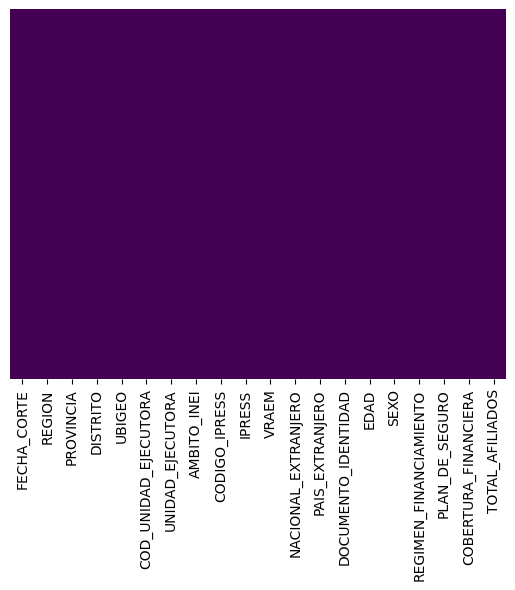

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### 1. ¿Existe diferencia entre la edad de los afiliados según el sexo? ¿Cuáles son las conclusiones? (2 puntos)

## Si

1) Los hombres afiliados son en promedio son 1 año mas jovenes que las mujeres afiliadas.
2) Las mujeres representan casi un 54% de los afiliados.
3) De la grafica countplot por sexo segun edad, **parece** existir un rango de edad donde hay mas afiliados hombres que mujeres. (Requiere analisis)

In [10]:
df.groupby('SEXO')[['EDAD']].mean()

,EDAD
SEXO,
FEMENINO,34.027278
MASCULINO,32.922965


<Axes: xlabel='SEXO', ylabel='count'>

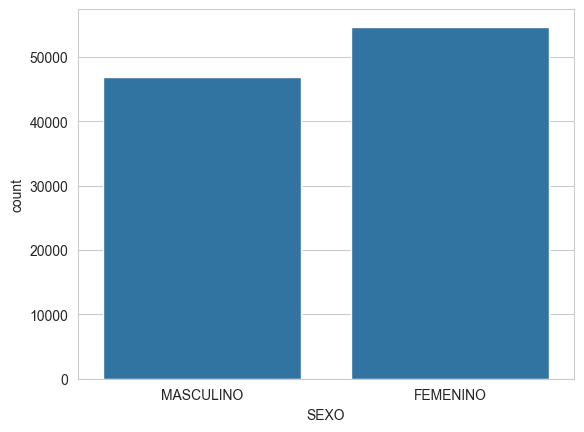

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='SEXO',data =df)

In [21]:
df.groupby('SEXO').count()
df.groupby('SEXO').size() * 100 / len(df) # sin datos faltantes

SEXO
FEMENINO     53.822916
MASCULINO    46.177084
dtype: float64

C:\Users\rodyv\AppData\Local\Temp\ipykernel_27992\1769300598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SEXO',y='EDAD',data=df,palette='winter')


<Axes: xlabel='SEXO', ylabel='EDAD'>

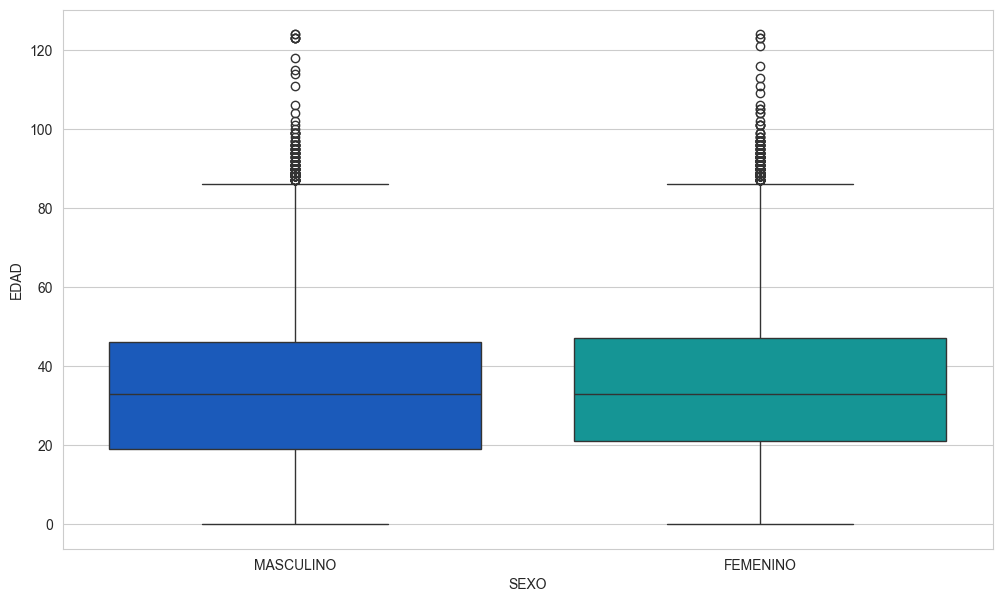

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='SEXO',y='EDAD',data=df,palette='winter')

#### 2. Describir la correlación entre la edad y el total de afiliados. ¿Cuáles son las conclusiones? (2 puntos)

Si sepramos la poblacion en bbs, jovenes y viejos. Para los bbs directamente proporcional, para los jovenes tambien y para los viejos inversamente proporcional.

<Axes: xlabel='EDAD', ylabel='count'>

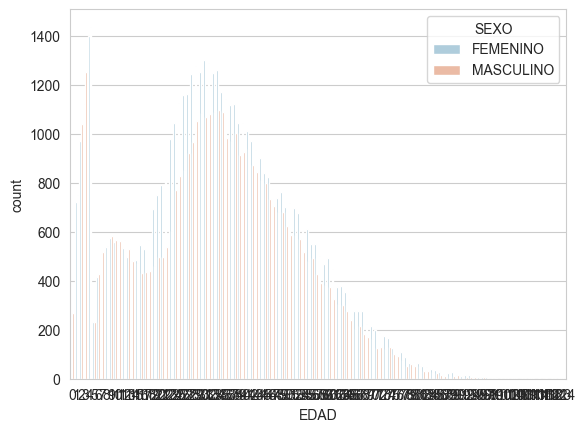

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='EDAD', hue='SEXO',data=df,palette='RdBu_r')
#sns.displot(df['EDAD'].dropna(),kde=False,color='darkred',bins=30)

#### 3. Describir la edad de los afiliados de manera descriptiva y haciendo uso de la visualización más adecuada. ¿Cuáles son las conclusiones? (2 puntos)

Similar a la pirameide poblacional peruana, pero entre los 4 y 20 anos, la gente parece no afiliarse.

<Axes: xlabel='EDAD', ylabel='Count'>

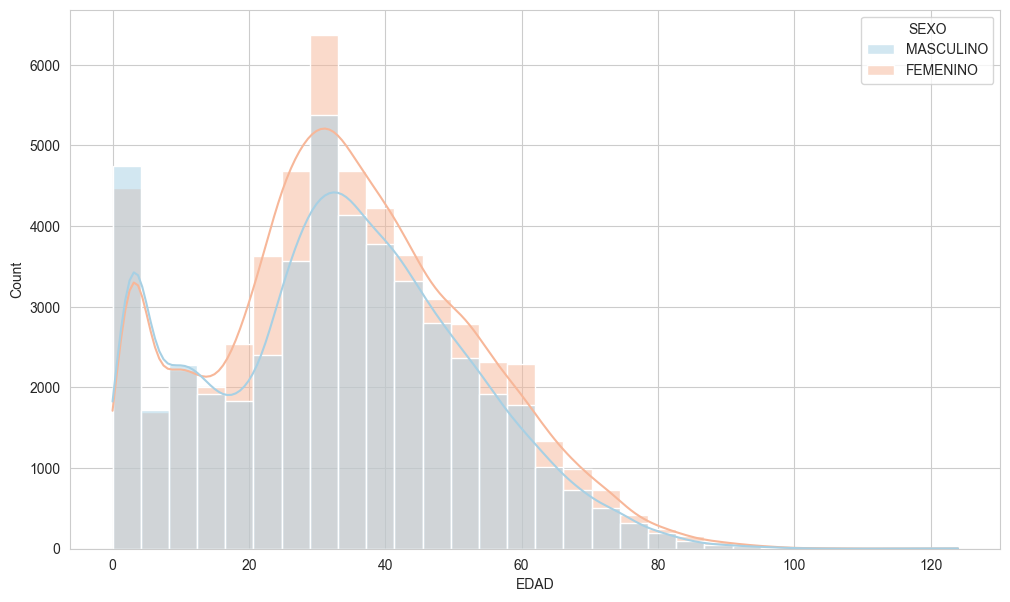

In [50]:
sns.set_style('whitegrid')
df.groupby('SEXO')[['EDAD']].count()

sxe = df.groupby('SEXO')['EDAD'].value_counts()
sxe
# graficar la distribución de la edad por sexo
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='EDAD', hue='SEXO', kde=True, bins=30, palette='RdBu_r')



#### 4. ¿Existe diferencia entre la dispersión de la edad de los afiliados según su plan de seguro? ¿Cuáles son las conclusiones? (2 puntos)

In [ ]:
quiza

#### 5. ¿Existe diferencia entre la dispersión de la edad de los afiliados según el régimen de financiamiento? ¿Cuáles son las conclusiones? (2 puntos)

In [ ]:
tampoco se